In [2]:
%matplotlib inline
import os
from PIL import Image
from numpy import *
from pylab import *
from skimage.color import rgb2gray
from skimage.color import gray2rgb

all_images = []
all_image_root = 'PH2Dataset/PH2 Dataset images'

#gather all images in all_image_root and store them in all_images
def gather_images():
    for dirpath, dirnames, filenames in os.walk(all_image_root):
        for filename in [f for f in filenames if ( f.endswith(".bmp") and "_" not in f  )]:
            all_images.append(os.path.join(dirpath, filename))

gather_images()
   

# Hair Removal Filter

In [20]:
from scipy.ndimage import filters
from skimage.filters import threshold_otsu, gaussian


def create_mask(im):
    imx = zeros(im.shape)
    imy = zeros(im.shape)
    filters.sobel(im, 1, imx)
    filters.sobel(im, 0, imy)
    mask = sqrt(imx**2+imy**2)
    mask = mask / mask.max()
    mask = gaussian(mask, 4)
    thresh = threshold_otsu(rgb2gray(mask))
    mask = mask > thresh
    mask = mask.astype(float)
    
    return mask


def hair_removal(im, img_filter_amount=8):
    
    # create filtered image
    filtered = filters.median_filter(im, img_filter_amount)
    
    # create filter mask
    mask = create_mask(im)
    
    # inverse mask
    inv_mask = (1.0 - mask)
    
    # create composite of original and filtered using the mask
    comp = (im * inv_mask) + (filtered * mask)
    
    return comp, mask, filtered

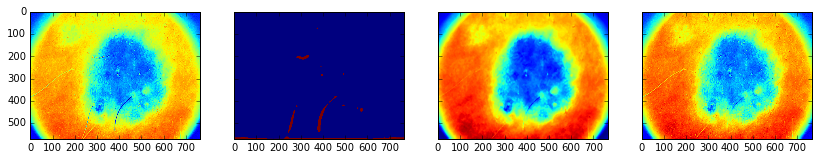

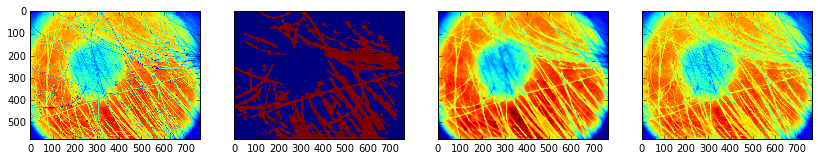

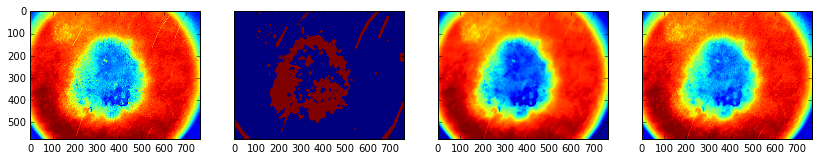

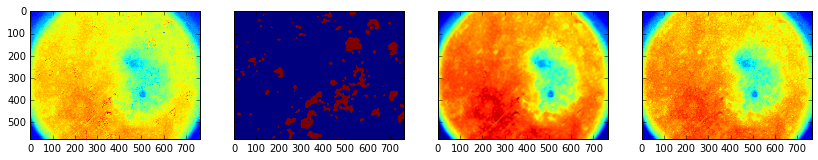

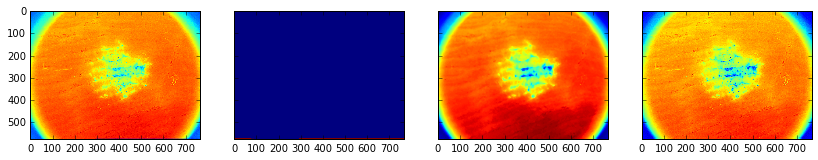

In [21]:
for i in range(5):
    im = array(Image.open(all_images[i]).convert('L'))
    
    comp, mask, filtered = hair_removal(im)
    
    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(im)
    
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(mask)
    
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(filtered)    
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(comp)
    
    show()